In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
 
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976655e+07,1.976655e+07,False,NaN,1,NaN,NaN,None,2024-10-12T10:04:00.000Z,62823.376532,2.869403e+10,-5.0436,0.195800,2.773049,0.938811,8.223895,6.610850,4.344219,1.241801e+12,56.7104,1.319291e+12,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203822e+08,1.203822e+08,True,NaN,2,NaN,NaN,None,2024-10-12T10:04:00.000Z,2443.817873,1.251079e+10,-16.7970,-0.063094,1.103253,0.802021,3.851047,-7.439551,-24.035167,2.941922e+11,13.4333,2.941922e+11,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
2,825,Tether USDt,USDT,tether,100106,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.197365e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-12T10:04:00.000Z,0.999731,4.937874e+10,-6.8387,0.007166,0.039729,-0.029889,-0.024697,-0.078014,-0.107136,1.197043e+11,5.4661,1.213310e+11,None,2024-10-12T10:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 13:11:40.504749
3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459320e+08,1.459320e+08,False,NaN,4,NaN,NaN,None,2024-10-12T10:04:00.000Z,576.338713,1.591252e+09,-1.5764,0.148997,1.563789,2.342087,5.789823,10.064449,6.902793,8.410628e+10,3.8406,8.410628e+10,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.696560e+08,5.864281e+08,True,NaN,5,NaN,NaN,None,2024-10-12T10:04:00.000Z,145.716815,1.610122e+09,-11.8577,0.045683,2.531582,0.783535,8.413410,0.671311,-0.675375,6.843678e+10,3.1259,8.545244e+10,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
5,3408,USDC,USDC,usd-coin,22415,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.497715e+10,3.497715e+10,False,NaN,6,NaN,NaN,None,2024-10-12T10:04:00.000Z,0.999985,4.623886e+09,-12.2127,0.004434,-0.001272,-0.016138,0.001550,-0.020013,-0.049856,3.497664e+10,1.5973,3.497664e+10,None,2024-10-12T10:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-12 13:11:40.504749
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-12T10:04:00.000Z,0.539626,7.734520e+08,-40.9416,0.132130,0.067384,1.218413,0.090807,-5.186886,2.057713,3.056713e+10,1.3963,5.396258e+10,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463337e+11,1.463337e+11,True,NaN,8,NaN,NaN,None,2024-10-12T10:04:00.000Z,0.111204,6.412431e+08,-9.8629,-0.010475,2.513839,1.234612,8.929902,6.676704,-2.486993,1.627284e+10,0.7434,1.627284e+10,None,2024-10-12T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:11:40.504749
8,1958,TRON,TRX,tron,1047,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.655448e+10,8.655453e+10,True

In [20]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)



    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Stephen Wagude\OneDrive - LVCT Health\Data Analyst Boot camp\Python\API.csv'):
        df.to_csv(r'C:\Users\Stephen Wagude\OneDrive - LVCT Health\Data Analyst Boot camp\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Stephen Wagude\OneDrive - LVCT Health\Data Analyst Boot camp\Python\API.csv', mode='a', header=False)


In [21]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [22]:
df72 =pd.read_csv(r'C:\Users\Stephen Wagude\OneDrive - LVCT Health\Data Analyst Boot camp\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976656e+07,1.976656e+07,False,NaN,1,NaN,NaN,NaN,2024-10-12T10:29:00.000Z,62948.578925,2.836205e+10,-7.2147,0.382132,3.188705,1.165958,8.471033,7.291960,4.631878,1.244277e+12,56.7172,1.321920e+12,NaN,2024-10-12T10:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
1,1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203822e+08,1.203822e+08,True,NaN,2,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,2452.036636,1.241314e+10,-17.8876,0.290164,1.577432,1.173635,4.243860,-6.354637,-23.598922,2.951816e+11,13.4571,2.951816e+11,NaN,2024-10-12T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
2,2,825,Tether USDt,USDT,tether,100109,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.197365e+11,1.213636e+11,True,NaN,3,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,0.999638,4.894806e+10,-8.3770,0.002392,0.034495,-0.049212,-0.041862,-0.055951,-0.078243,1.196932e+11,5.4559,1.213197e+11,NaN,2024-10-12T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 13:33:47.267078
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459320e+08,1.459320e+08,False,NaN,4,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,577.046283,1.580511e+09,-2.8172,0.280214,1.753111,2.342953,5.842813,10.507117,7.083482,8.420954e+10,3.8385,8.420954e+10,NaN,2024-10-12T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
4,4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.696559e+08,5.864280e+08,True,NaN,5,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,146.052898,1.598929e+09,-12.6989,0.354329,2.738990,1.052942,8.537140,1.529327,-0.192291,6.859460e+10,3.1272,8.564951e+10,NaN,2024-10-12T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
5,5,3408,USDC,USDC,usd-coin,22415,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.497665e+10,3.497665e+10,False,NaN,6,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,0.999841,4.579266e+09,-13.3559,-0.006356,-0.011834,-0.028855,-0.011256,-0.005474,-0.019732,3.497109e+10,1.5942,3.497109e+10,NaN,2024-10-12T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-12 13:33:47.267078
6,6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,0.539395,7.558836e+08,-42.7480,0.066918,0.192116,1.267863,0.081172,-4.881230,1.673526,3.055405e+10,1.3929,5.393947e+10,NaN,2024-10-12T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
7,7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.463337e+11,1.463337e+11,True,NaN,8,NaN,NaN,NaN,2024-10-12T10:28:00.000Z,0.112008,6.436933e+08,-9.8395,0.876055,3.145881,2.210882,9.790353,7.991269,-1.563479,1.639050e+10,0.7470,1.639050e+10,NaN,2024-10-12T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 13:33:47.267078
8,8,1958,TRON,TRX,tron,1047,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.655438e+10,8.65

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976658e+07,1.976658e+07,False,NaN,1,NaN,NaN,None,2024-10-12T11:08:00.000Z,63009.810748,2.830762e+10,-7.7852,0.309310,3.131921,1.295765,8.718472,7.218996,5.065076,1.245488e+12,56.6906,1.323206e+12,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203822e+08,1.203822e+08,True,NaN,2,NaN,NaN,None,2024-10-12T11:08:00.000Z,2454.011995,1.247844e+10,-17.2372,0.424137,1.725200,1.386782,4.571280,-6.916805,-23.317900,2.954194e+11,13.4465,2.954194e+11,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
2,825,Tether USDt,USDT,tether,100118,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.197365e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.999525,4.896578e+10,-8.5784,-0.024023,-0.016175,-0.043442,-0.049604,-0.087853,-0.088536,1.196796e+11,5.4489,1.213059e+11,None,2024-10-12T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 14:12:04.268530
3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459320e+08,1.459320e+08,False,NaN,4,NaN,NaN,None,2024-10-12T11:08:00.000Z,577.875601,1.574201e+09,-3.7085,0.286486,1.819604,2.917745,6.133334,10.846468,7.732309,8.433056e+10,3.8395,8.433056e+10,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.696557e+08,5.864279e+08,True,NaN,5,NaN,NaN,None,2024-10-12T11:08:00.000Z,146.640151,1.606227e+09,-12.6283,0.652747,3.459228,1.800688,9.057366,1.245707,0.937086,6.887039e+10,3.1348,8.599388e+10,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
5,3408,USDC,USDC,usd-coin,22415,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.497703e+10,3.497703e+10,False,NaN,6,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.999810,4.527324e+09,-14.2588,-0.019596,-0.058376,-0.015545,-0.017120,-0.027912,-0.027643,3.497038e+10,1.5920,3.497038e+10,None,2024-10-12T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-12 14:12:04.268530
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.540135,7.389591e+08,-44.2316,0.101203,0.657329,1.530760,0.302944,-6.062343,1.420821,3.059599e+10,1.3926,5.401353e+10,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463346e+11,1.463346e+11,True,NaN,8,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.111747,6.479490e+08,-9.0785,0.556916,2.979310,2.245337,9.790648,7.307405,-1.086126,1.635244e+10,0.7446,1.635244e+10,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
8,1958,TRON,TRX,tron,1047,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.655413e+10,8.655413e+10,Tru

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19766575.00000,19766575.00000,False,NaN,1,NaN,NaN,None,2024-10-12T11:08:00.000Z,63009.81075,28307615838.17104,-7.78520,0.30931,3.13192,1.29577,8.71847,7.21900,5.06508,1245488149883.37964,56.69060,1323206025705.06006,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
1,1027,Ethereum,ETH,ethereum,9409,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120382196.30100,120382196.30100,True,NaN,2,NaN,NaN,None,2024-10-12T11:08:00.000Z,2454.01200,12478437897.80857,-17.23720,0.42414,1.72520,1.38678,4.57128,-6.91680,-23.31790,295419353710.63837,13.44650,295419353710.64001,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
2,825,Tether USDt,USDT,tether,100118,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119736504562.84830,121363587340.04202,True,NaN,3,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.99952,48965779541.72061,-8.57840,-0.02402,-0.01617,-0.04344,-0.04960,-0.08785,-0.08854,119679583372.96307,5.44890,121305892655.99001,None,2024-10-12T11:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-12 14:12:04.268530
3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932034.15849,145932034.15849,False,NaN,4,NaN,NaN,None,2024-10-12T11:08:00.000Z,577.87560,1574201197.25884,-3.70850,0.28649,1.81960,2.91774,6.13333,10.84647,7.73231,84330561943.88341,3.83950,84330561943.88000,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469655725.67570,586427920.10711,True,NaN,5,NaN,NaN,None,2024-10-12T11:08:00.000Z,146.64015,1606226755.38808,-12.62830,0.65275,3.45923,1.80069,9.05737,1.24571,0.93709,68870386376.45840,3.13480,85993878562.03000,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
5,3408,USDC,USDC,usd-coin,22415,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34977032152.44557,34977032152.44557,False,NaN,6,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.99981,4527324341.49505,-14.25880,-0.01960,-0.05838,-0.01554,-0.01712,-0.02791,-0.02764,34970376439.93169,1.59200,34970376439.93000,None,2024-10-12T11:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-12 14:12:04.268530
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.54014,738959112.01582,-44.23160,0.10120,0.65733,1.53076,0.30294,-6.06234,1.42082,30595993386.28353,1.39260,54013526261.72000,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-12 14:12:04.268530
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146334576383.70526,146334576383.70526,True,NaN,8,NaN,NaN,None,2024-10-12T11:08:00.000Z,0.11175,647949026.36639,-9.07850,0.55692,2.97931,2.24534,9.79065,7.30740,-1.08613,16352440766.99895,0.74460,16352440767.00000,None,2024-10-12T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,

In [26]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.30931,3.13192,1.29577,8.71847,7.21900,5.06508
Ethereum,0.42414,1.72520,1.38678,4.57128,-6.91680,-23.31790
Tether USDt,-0.02402,-0.01617,-0.04344,-0.04960,-0.08785,-0.08854
BNB,0.28649,1.81960,2.91774,6.13333,10.84647,7.73231
Solana,0.65275,3.45923,1.80069,9.05737,1.24571,0.93709
USDC,-0.01960,-0.05838,-0.01554,-0.01712,-0.02791,-0.02764
XRP,0.10120,0.65733,1.53076,0.30294,-6.06234,1.42082
Dogecoin,0.55692,2.97931,2.24534,9.79065,7.30740,-1.08613
TRON,0.07732,2.71083,6.43240,6.27104,29.32064,18.87671


In [27]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.30931
              quote.USD.percent_change_24h     3.13192
              quote.USD.percent_change_7d      1.29577
              quote.USD.percent_change_30d     8.71847
              quote.USD.percent_change_60d     7.21900
              quote.USD.percent_change_90d     5.06508
Ethereum      quote.USD.percent_change_1h      0.42414
              quote.USD.percent_change_24h     1.72520
              quote.USD.percent_change_7d      1.38678
              quote.USD.percent_change_30d     4.57128
              quote.USD.percent_change_60d    -6.91680
              quote.USD.percent_change_90d   -23.31790
Tether USDt   quote.USD.percent_change_1h     -0.02402
              quote.USD.percent_change_24h    -0.01617
              quote.USD.percent_change_7d     -0.04344
              quote.USD.percent_change_30d    -0.04960
              quote.USD.percent_change_60d    -0.08785
              quote.US

In [28]:
type(df4)

pandas.core.series.Series

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.30931
             quote.USD.percent_change_24h   3.13192
             quote.USD.percent_change_7d    1.29577
             quote.USD.percent_change_30d   8.71847
             quote.USD.percent_change_60d   7.21900
             quote.USD.percent_change_90d   5.06508
Ethereum     quote.USD.percent_change_1h    0.42414
             quote.USD.percent_change_24h   1.72520
             quote.USD.percent_change_7d    1.38678
             quote.USD.percent_change_30d   4.57128
             quote.USD.percent_change_60d  -6.91680
             quote.USD.percent_change_90d -23.31790
Tether USDt  quote.USD.percent_change_1h   -0.02402
             quote.USD.percent_change_24h  -0.01617
             quote.USD.percent_change_7d   -0.04344
             quote.USD.percent_change_30d  -0.04960
             quote.USD.percent_change_60d  -0.08785
             quote.USD.percent_change_90d  -0.08854
BNB          quote.USD.percent_change_1h    0.28649
             quote.USD.percent_change_24h   1.81960
             quote.USD.percent_change_7d    2.91774
             quote.USD.percent_change_30d   6.13333
             quote.USD.percent_change_60d  10.84647
             quote.USD.percent_change_90d   7.73231
Solana       quote.USD.percent_change_1h    0.65275
             quote.USD.percent_change_24h   3.45923
             quote.USD.percent_change_7d    1.80069
             quote.USD.percent_change_30d   9.05737
             quote.USD.percent_change_60d   1.24571
             quote.USD.percent_change_90d   0.93709
USDC         quote.USD.percent_change_1h   -0.01960
             quote.USD.percent_change_24h  -0.05838
             quote.USD.percent_change_7d   -0.01554
             quote.USD.percent_change_30d  -0.01712
             quote.USD.percent_change_60d  -0.02791
             quote.USD.percent_change_90d  -0.02764
XRP          quote.USD.percent_change_1h    0.10120
             quote.USD.percent_change_24h   0.65733
             quote.USD.percent_change_7d    1.53076
             quote.USD.percent_change_30d   0.30294
             quote.USD.percent_change_60d  -6.06234
             quote.USD.percent_change_90d   1.42082
Dogecoin     quote.USD.percent_change_1h    0.55692
             quote.USD.percent_change_24h   2.97931
             quote.USD.percent_change_7d    2.24534
             quote.USD.percent_change_30d   9.79065
             quote.USD.percent_change_60d   7.30740
             quote.USD.percent_change_90d  -1.08613
TRON         quote.USD.percent_change_1h    0.07732
             quote.USD.percent_change_24h   2.71083
             quote.USD.percent_change_7d    6.43240
             quote.USD.percent_change_30d   6.27104
             quote.USD.percent_change_60d  29.32064
             quote.USD.percent_change_90d  18.87671
Toncoin      quote.USD.percent_change_1h    0.53246
             quote.USD.percent_change_24h   1.92056
             quote.USD.percent_change_7d   -1.37232
             quote.USD.percent_change_30d  -2.16813
             quote.USD.percent_change_60d -15.27429
             quote.USD.percent_change_90d -28.02339
Cardano      quote.USD.percent_change_1h    0.45034
             quote.USD.percent_change_24h   2.63049
             quote.USD.percent_change_7d    0.54755
             quote.USD.percent_change_30d  -1.01401
             quote.USD.percent_change_60d   6.39479
             quote.USD.percent_change_90d -17.85539
Avalanche    quote.USD.percent_change_1h    0.27173
             quote.USD.percent_change_24h   7.50985
             quote.USD.percent_change_7d    9.98629
             quote.USD.percent_change_30d  20.77478
             quote.USD.percent_change_60d  37.24912
             quote.USD.percent_change_90d   9.64649
Shiba Inu    quote.USD.percent_change_1h    0.66115
             quote.USD.percent_change_24h   5.84222
             quote.USD.percent_change_7d    1.97998
             quote.USD.percent_change_30d

In [30]:
df5.count()

values    90
dtype: int64

In [33]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.30931
1,Bitcoin,quote.USD.percent_change_24h,3.13192
2,Bitcoin,quote.USD.percent_change_7d,1.29577
3,Bitcoin,quote.USD.percent_change_30d,8.71847
4,Bitcoin,quote.USD.percent_change_60d,7.21900
5,Bitcoin,quote.USD.percent_change_90d,5.06508
6,Ethereum,quote.USD.percent_change_1h,0.42414
7,Ethereum,quote.USD.percent_change_24h,1.72520
8,Ethereum,quote.USD.percent_change_7d,1.38678
9,Ethereum,quote.USD.percent_change_30d,4.57128


In [37]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.30931
1,Bitcoin,quote.USD.percent_change_24h,3.13192
2,Bitcoin,quote.USD.percent_change_7d,1.29577
3,Bitcoin,quote.USD.percent_change_30d,8.71847
4,Bitcoin,quote.USD.percent_change_60d,7.21900
5,Bitcoin,quote.USD.percent_change_90d,5.06508
6,Ethereum,quote.USD.percent_change_1h,0.42414
7,Ethereum,quote.USD.percent_change_24h,1.72520
8,Ethereum,quote.USD.percent_change_7d,1.38678
9,Ethereum,quote.USD.percent_change_30d,4.57128


In [41]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','70d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.30931
1,Bitcoin,24h,3.13192
2,Bitcoin,7d,1.29577
3,Bitcoin,30d,8.71847
4,Bitcoin,60d,7.21900
5,Bitcoin,70d,5.06508
6,Ethereum,1h,0.42414
7,Ethereum,24h,1.72520
8,Ethereum,7d,1.38678
9,Ethereum,30d,4.57128


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

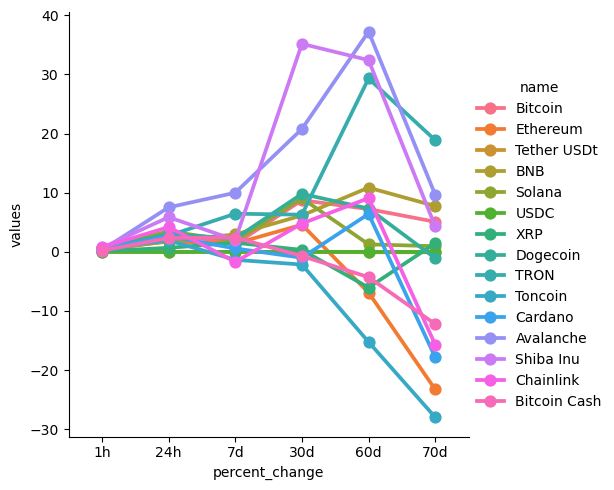

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [54]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,62948.57892,2024-10-12 13:33:47.267078
15,Bitcoin,62948.57892,2024-10-12 13:33:47.267078
30,Bitcoin,62912.76814,2024-10-12 13:38:42.609062
45,Bitcoin,62915.33147,2024-10-12 13:39:43.511449
60,Bitcoin,62933.75212,2024-10-12 13:40:44.344887
75,Bitcoin,62960.74381,2024-10-12 13:41:45.273955
90,Bitcoin,63016.66483,2024-10-12 14:03:17.577614
105,Bitcoin,62996.25580,2024-10-12 14:10:01.792207
120,Bitcoin,63009.81075,2024-10-12 14:11:02.617175
135,Bitcoin,63009.81075,2024-10-12 14:12:04.268530


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

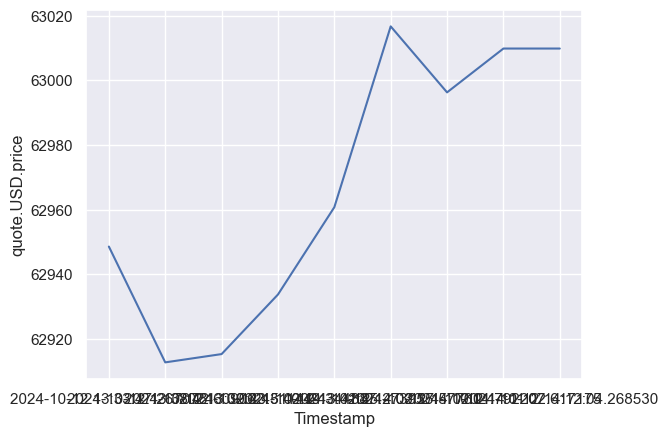

In [55]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)